## Feature Engineering
It would be good to add the region info for exploratory analysis. 
In the Wrangling Data step there where datasets with 'missing columns'. I'll be using interpolation/regression to fill these missing values.

- Adding new features: region, population?
- From 2015 to 2017 there are no entries for 'Social Support', it will be interpolated.
- From 2018 to 2019 there are no entries for 'Dystopia Residual', it will be interpolated. (It has a formula but can't find a proper definition online)
- Nan values

In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# newest interface
from seaborn import axes_style, objects as so
from matplotlib.figure import Figure

# Set plots theme
sns.set_theme(style="dark", palette=('#87b7e0','#cf604a'), color_codes=True)

In [2]:
df = pd.read_csv('../data/interim/WorldHappiness.csv')
df

,Year,Country,Happiness Rank,Happiness Score,Freedom,Generosity,Healthy life expectancy,Perceptions of corruption,GDP per capita,Social support,Dystopia Residual
0,2015,Switzerland,1,7.587,0.66557,0.29678,0.94143,0.41978,1.39651,NaN,2.51738
1,2015,Iceland,2,7.561,0.62877,0.43630,0.94784,0.14145,1.30232,NaN,2.70201
2,2015,Denmark,3,7.527,0.64938,0.34139,0.87464,0.48357,1.32548,NaN,2.49204
3,2015,Norway,4,7.522,0.66973,0.34699,0.88521,0.36503,1.45900,NaN,2.46531
4,2015,Canada,5,7.427,0.63297,0.45811,0.90563,0.32957,1.32629,NaN,2.45176
...,...,...,...,...,...,...,...,...,...,...,...
1225,2022,Botswana,142,3.471,0.57100,0.01200,0.28000,0.10200,1.50300,0.815,0.18700
1226,2022,Rwanda,143,3.268,0.62100,0.18700,0.46200,0.54400,0.78500,0.133,0.53600
1227,2022,Zimbabwe,144,2.995,0.32900,0.10600,0.27000,0.10500,0.94700,0.690,0.54800
1228,2022,Lebanon,145,2.955,0.10300,0.08200,0.63100,0.03400,1.39200,0.498,0.21600


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1230 entries, 0 to 1229
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Year                       1230 non-null   int64  
 1   Country                    1230 non-null   object 
 2   Happiness Rank             1230 non-null   int64  
 3   Happiness Score            1230 non-null   float64
 4   Freedom                    1230 non-null   float64
 5   Generosity                 1230 non-null   float64
 6   Healthy life expectancy    1230 non-null   float64
 7   Perceptions of corruption  1229 non-null   float64
 8   GDP per capita             1230 non-null   float64
 9   Social support             760 non-null    float64
 10  Dystopia Residual          918 non-null    float64
dtypes: float64(8), int64(2), object(1)
memory usage: 105.8+ KB


###  Add Features

#### Region

In [4]:
# Read region data from datasets of 2015 and 2016
df_2015 = pd.read_csv('../data/raw/HappinessScore2015.csv')
df_2016 = pd.read_csv('../data/raw/HappinessScore2016.csv')

# Datasets from 2015 and 2016 have the region information. 
regions_df = df_2015[['Country', 'Region']].merge(df_2016[['Country', 'Region']], on='Country', how = 'outer')
regions_df['Region'] = regions_df['Region_x'].fillna(regions_df['Region_y'])
regions_df = regions_df.drop(['Region_x', 'Region_y'], axis=1)

In [5]:
# Apply same renaming
countries_name_map = {
    'Macedonia' : 'North Macedonia',
    'Congo' : 'Congo (Kinshasa)',
    'Taiwan' : 'Taiwan Province of China',
    'Swaziland' : 'Eswatini, Kingdom of',
    'Northern Cyprus' : 'North Cyprus',
    'Hong Kong' : 'Hong Kong S.A.R. of China',
    'Hong Kong S.A.R., China' : 'Hong Kong S.A.R. of China',
    'Czech Republic' : 'Czechia',
    'Trinidad & Tobago': 'Trinidad and Tobago'
}

# Lets map the names of the countries
regions_df['Country'] = regions_df['Country'].replace(countries_name_map)
regions_df

,Country,Region
0,Switzerland,Western Europe
1,Iceland,Western Europe
2,Denmark,Western Europe
3,Norway,Western Europe
4,Canada,North America
...,...,...
159,Belize,Latin America and Caribbean
160,Somalia,Sub-Saharan Africa
161,Somaliland Region,Sub-Saharan Africa
162,Namibia,Sub-Saharan Africa


In [6]:
# Save regions_df
regions_df.to_csv('../data/processed/CountryRegions.csv', index=False)

In [7]:
df = df.merge(regions_df, on='Country', how='left')
df

,Year,Country,Happiness Rank,Happiness Score,Freedom,Generosity,Healthy life expectancy,Perceptions of corruption,GDP per capita,Social support,Dystopia Residual,Region
0,2015,Switzerland,1,7.587,0.66557,0.29678,0.94143,0.41978,1.39651,NaN,2.51738,Western Europe
1,2015,Iceland,2,7.561,0.62877,0.43630,0.94784,0.14145,1.30232,NaN,2.70201,Western Europe
2,2015,Denmark,3,7.527,0.64938,0.34139,0.87464,0.48357,1.32548,NaN,2.49204,Western Europe
3,2015,Norway,4,7.522,0.66973,0.34699,0.88521,0.36503,1.45900,NaN,2.46531,Western Europe
4,2015,Canada,5,7.427,0.63297,0.45811,0.90563,0.32957,1.32629,NaN,2.45176,North America
...,...,...,...,...,...,...,...,...,...,...,...,...
1225,2022,Botswana,142,3.471,0.57100,0.01200,0.28000,0.10200,1.50300,0.815,0.18700,Sub-Saharan Africa
1226,2022,Rwanda,143,3.268,0.62100,0.18700,0.46200,0.54400,0.78500,0.133,0.53600,Sub-Saharan Africa
1227,2022,Zimbabwe,144,2.995,0.32900,0.10600,0.27000,0.10500,0.94700,0.690,0.54800,Sub-Saharan Africa
1228,2022,Lebanon,145,2.955,0.10300,0.08200,0.63100,0.03400,1.39200,0.498,0.21600,Middle East and Northern Africa


In [8]:
# Check for nan values 
df[df.Region.isna()].Country.unique()

array(['Gambia', 'Maldives'], dtype=object)

In [9]:
# Check possible region values
df.Region.unique()

array(['Western Europe', 'North America', 'Australia and New Zealand',
       'Middle East and Northern Africa', 'Latin America and Caribbean',
       'Southeastern Asia', 'Central and Eastern Europe', 'Eastern Asia',
       'Sub-Saharan Africa', 'Southern Asia', nan], dtype=object)

In [10]:
# Add the regions
df.loc[df['Country'] == 'Maldives', 'Region'] = 'Southeastern Asia'
df.loc[df['Country'] == 'Gambia', 'Region'] = 'Middle East and Northern Africa'

### Missing Values Imputation

Check for nan values

In [11]:
## Missing Values %
round((df.isna().sum() / len(df))*100, 2)

Year                          0.00
Country                       0.00
Happiness Rank                0.00
Happiness Score               0.00
Freedom                       0.00
Generosity                    0.00
Healthy life expectancy       0.00
Perceptions of corruption     0.08
GDP per capita                0.00
Social support               38.21
Dystopia Residual            25.37
Region                        0.00
dtype: float64

In [12]:
## Missing Values Count
df.isna().sum()

Year                           0
Country                        0
Happiness Rank                 0
Happiness Score                0
Freedom                        0
Generosity                     0
Healthy life expectancy        0
Perceptions of corruption      1
GDP per capita                 0
Social support               470
Dystopia Residual            312
Region                         0
dtype: int64

#### One missing value in Perception of Corruption

In [13]:
# First fix one record in perception of corruption
df[df['Perceptions of corruption'].isna()]

,Year,Country,Happiness Rank,Happiness Score,Freedom,Generosity,Healthy life expectancy,Perceptions of corruption,GDP per capita,Social support,Dystopia Residual,Region
489,2018,United Arab Emirates,20,6.774,0.284,0.186,0.67,NaN,2.096,0.776,NaN,Middle East and Northern Africa


As we do not count with an exact formula that could calculate this value given the rest of the features, we need to imputate this value with some approximation. 

- Every record is highly important as it represents the performance of a country in one year, so dropping the column is not an option. 

- There are several ways of handling missing data, some really simple like calculating the mean of 'Perception of corruption' values, but not from the entire column (it wouldnt be accurate) but filtering the records from the country and then take the mean. 

- More advanced imputation techniques involve interpolation, which secure highly accuracy but being not so many records forthecountry a simple mean will do. 

In [14]:
# Filter United Arab emirates records
emirates_df = df[df.Country=='United Arab Emirates']
emirates_df

,Year,Country,Happiness Rank,Happiness Score,Freedom,Generosity,Healthy life expectancy,Perceptions of corruption,GDP per capita,Social support,Dystopia Residual,Region
19,2015,United Arab Emirates,20,6.9010,0.641570,0.264280,0.809250,0.385830,1.427270,NaN,2.247430,Middle East and Northern Africa
185,2016,United Arab Emirates,28,6.5730,0.562150,0.265910,0.729930,0.355610,1.573520,NaN,2.215070,Middle East and Northern Africa
335,2017,United Arab Emirates,21,6.6480,0.608345,0.360942,0.726798,0.324490,1.626343,NaN,1.734704,Middle East and Northern Africa
489,2018,United Arab Emirates,20,6.7740,0.284000,0.186000,0.670000,NaN,2.096000,0.776000,NaN,Middle East and Northern Africa
646,2019,United Arab Emirates,21,6.8250,0.598000,0.262000,0.825000,0.182000,1.503000,1.310000,NaN,Middle East and Northern Africa
802,2020,United Arab Emirates,21,6.7908,0.652936,0.280656,0.787814,0.220214,1.431086,1.251171,2.166966,Middle East and Northern Africa
959,2021,United Arab Emirates,25,6.5610,0.670000,0.236000,0.594000,0.223000,1.555000,0.860000,2.422000,Middle East and Northern Africa
1107,2022,United Arab Emirates,24,6.5760,0.702000,0.204000,0.633000,0.250000,1.998000,0.980000,1.809000,Middle East and Northern Africa


0.2773061545290767 0.25


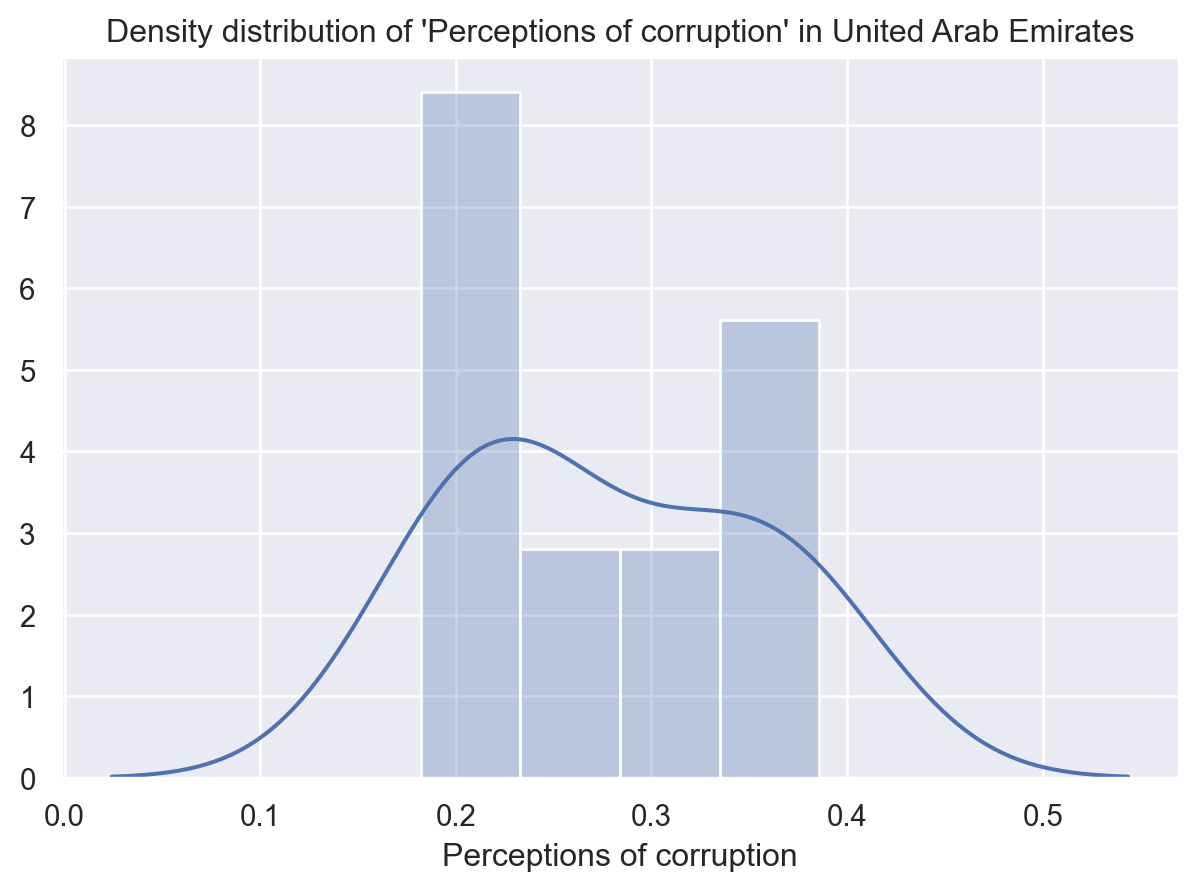

In [15]:
# Mean and median imputation is a great choice, if distribution is normal or close to normal.
# In case of skewed distribution we shoud go with meadian value.
print(emirates_df["Perceptions of corruption"].mean(), emirates_df["Perceptions of corruption"].median())

(
    so.Plot(emirates_df, x="Perceptions of corruption")
    .add(so.Bars(alpha=.3), so.Hist("density"))
    .add(so.Line(), so.KDE())
    .label(title="Density distribution of 'Perceptions of corruption' in United Arab Emirates")
)

In [16]:
# We can observe there is low variance and it is slightly skewed to the left, meaning they are around the median value, so median is a good imputation.
df.loc[df['Perceptions of corruption'].isna(), 'Perceptions of corruption'] = emirates_df["Perceptions of corruption"].median()

### Fix Missing Data with Interpolation
- Dystopia Residual: 25% of the data is missing, 312 rows
- Social support: 38% of the datais missing, 470 rows

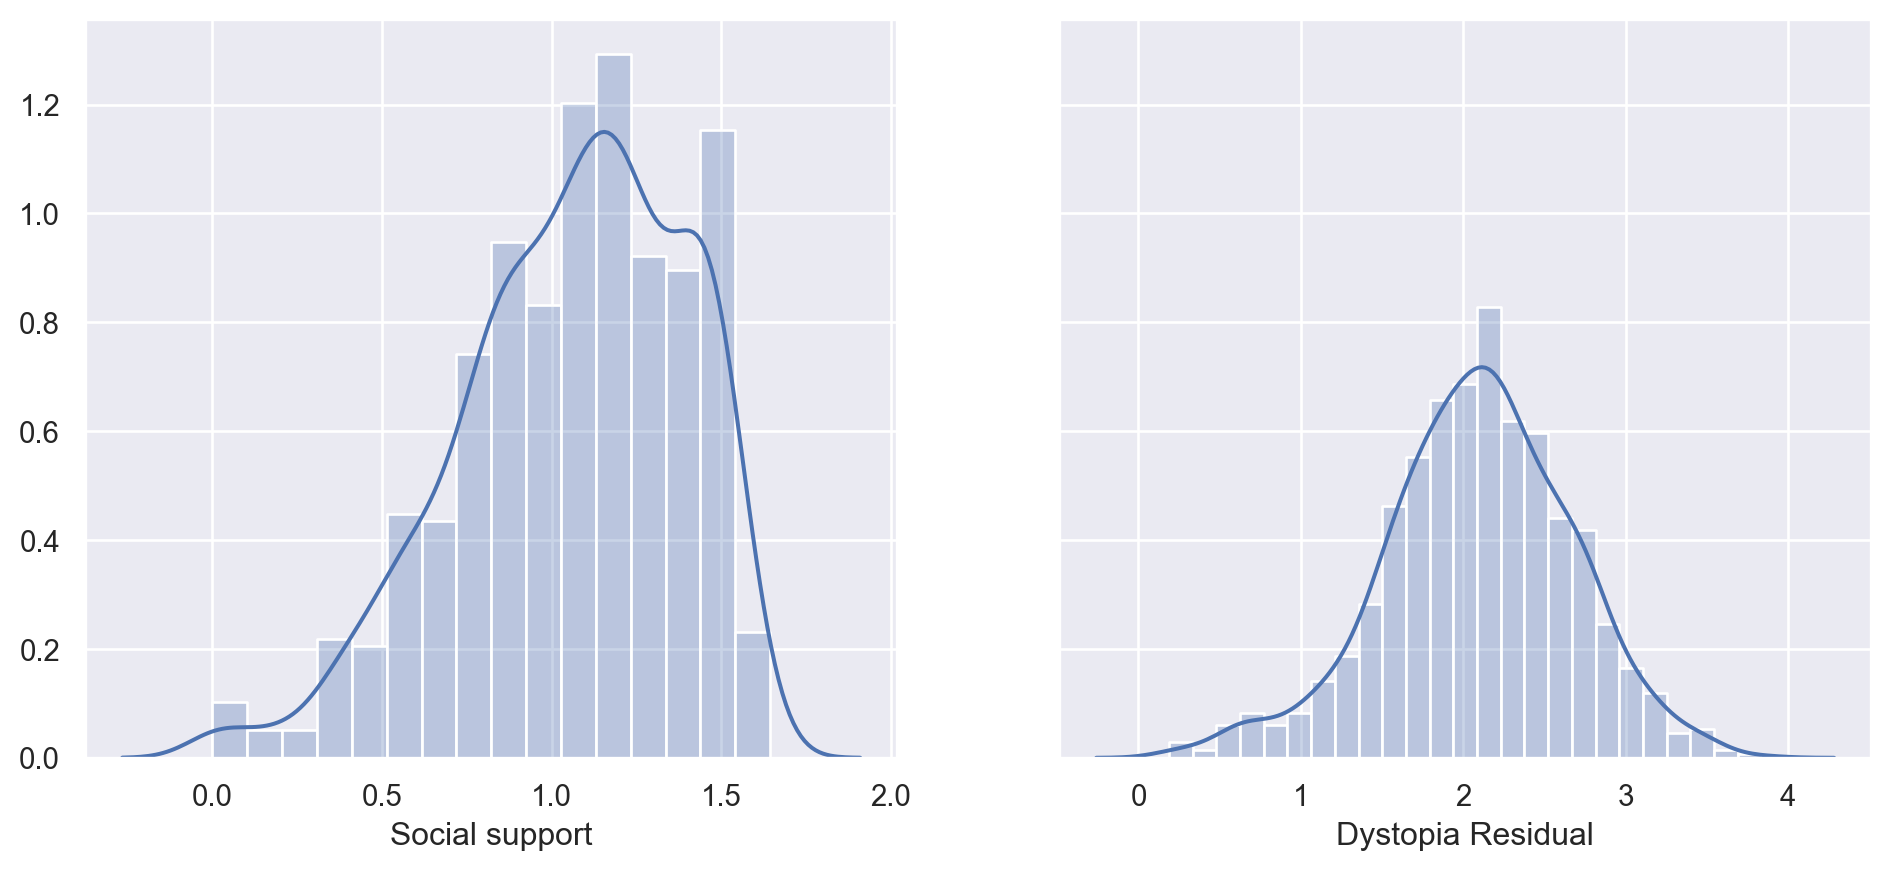

In [17]:
# Visualize Density Distribution of Social support & Dystopia residual 
f = Figure(figsize=(12, 5))
(
    so.Plot(df)
    .add(so.Bars(alpha=.3), so.Hist("density"))
    .add(so.Line(), so.KDE())
    .pair(x=['Social support', 'Dystopia Residual'])
    .on(f)
)

In [18]:
# Apply label encoding for categorical columns Country & Region with .cat.codes
df_le = df.copy()
df_le['Country'] = df_le['Country'].astype('category').cat.codes
df_le['Region'] = df_le['Region'].astype('category').cat.codes
df_le

,Year,Country,Happiness Rank,Happiness Score,Freedom,Generosity,Healthy life expectancy,Perceptions of corruption,GDP per capita,Social support,Dystopia Residual,Region
0,2015,143,1,7.587,0.66557,0.29678,0.94143,0.41978,1.39651,NaN,2.51738,9
1,2015,61,2,7.561,0.62877,0.43630,0.94784,0.14145,1.30232,NaN,2.70201,9
2,2015,38,3,7.527,0.64938,0.34139,0.87464,0.48357,1.32548,NaN,2.49204,9
3,2015,110,4,7.522,0.66973,0.34699,0.88521,0.36503,1.45900,NaN,2.46531,9
4,2015,25,5,7.427,0.63297,0.45811,0.90563,0.32957,1.32629,NaN,2.45176,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1225,2022,18,142,3.471,0.57100,0.01200,0.28000,0.10200,1.50300,0.815,0.18700,8
1226,2022,124,143,3.268,0.62100,0.18700,0.46200,0.54400,0.78500,0.133,0.53600,8
1227,2022,165,144,2.995,0.32900,0.10600,0.27000,0.10500,0.94700,0.690,0.54800,8
1228,2022,80,145,2.955,0.10300,0.08200,0.63100,0.03400,1.39200,0.498,0.21600,4


In [19]:
# Final datasets to compare algorithms
df_ss = df_le['Social support'].copy()
df_dr = df_le['Dystopia Residual'].copy()

#### KNN

In [20]:
### Defining KNN imputer
from sklearn.impute import KNNImputer
knn = KNNImputer(n_neighbors=5)
prediction = knn.fit_transform(df_le)

df_KNNimputer = pd.DataFrame(prediction[:, [9,10]], columns=['Social support', 'Dystopia Residual'])
df_KNNimputer

,Social support,Dystopia Residual
0,1.422681,2.51738
1,1.461513,2.70201
2,1.403490,2.49204
3,1.401235,2.46531
4,1.340878,2.45176
...,...,...
1225,0.815000,0.18700
1226,0.133000,0.53600
1227,0.690000,0.54800
1228,0.498000,0.21600


In [21]:
# Check missing values again 
df_KNNimputer.isna().sum()

Social support       0
Dystopia Residual    0
dtype: int64

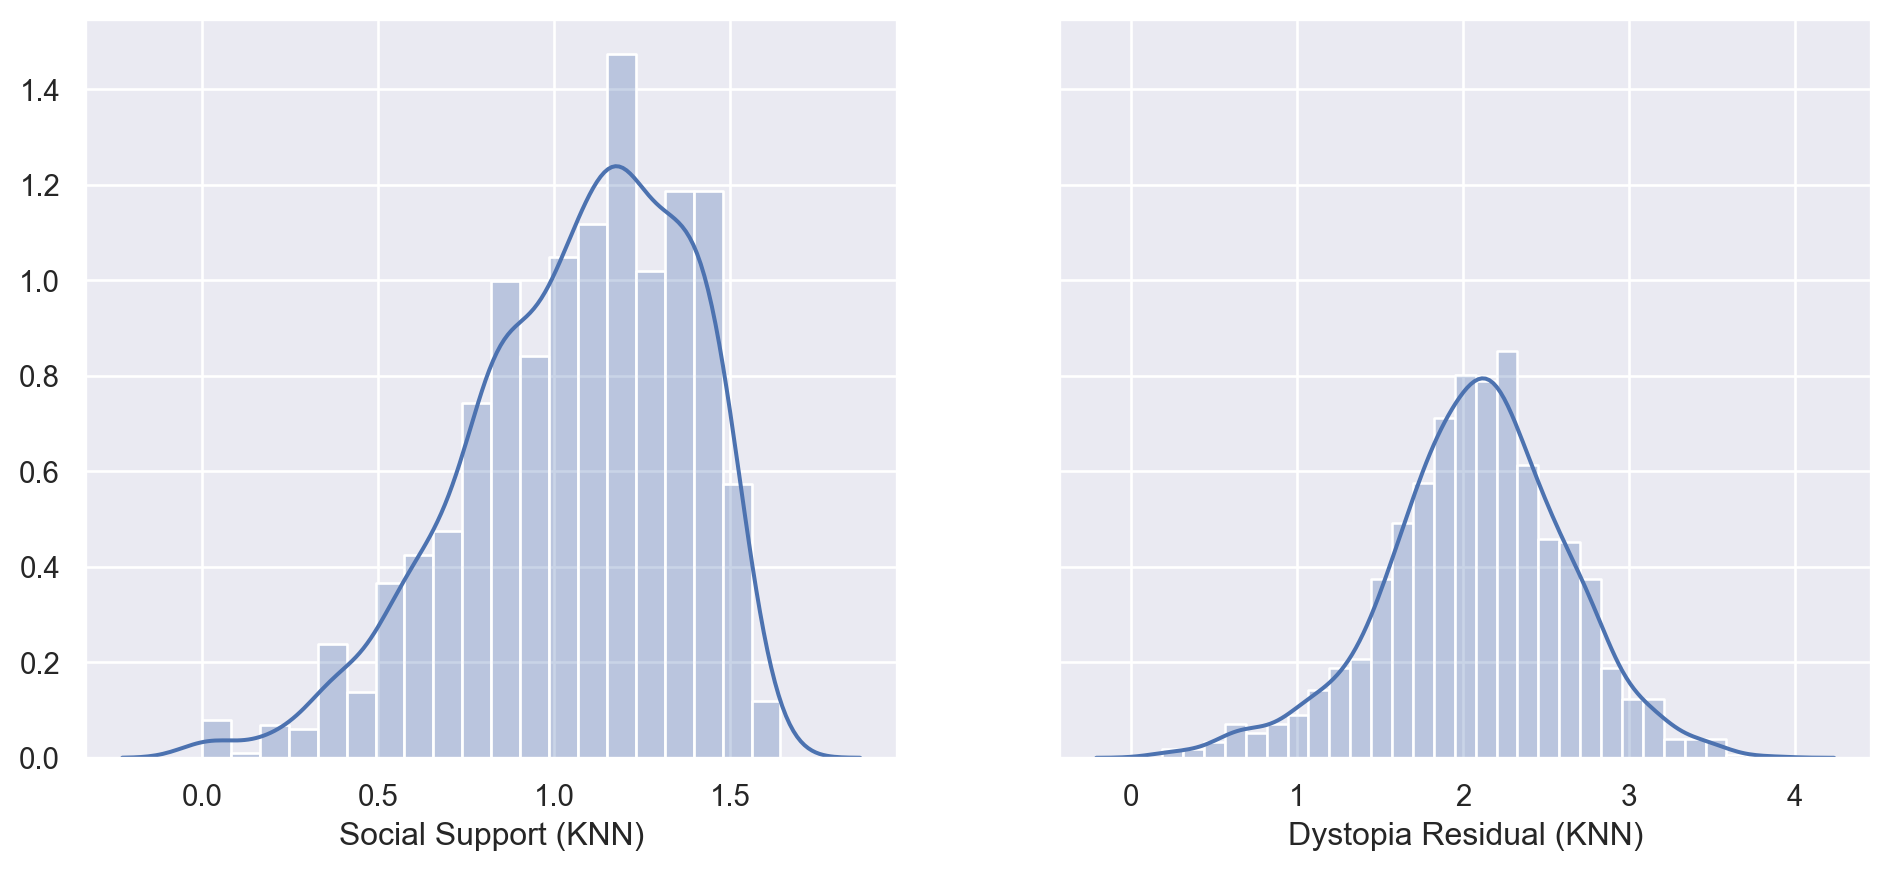

In [22]:
# Plot distribution of columns with imputed values with KNN
f = Figure(figsize=(12, 5))
(
    so.Plot(df_KNNimputer)
    .add(so.Bars(alpha=.3), so.Hist("density"))
    .add(so.Line(), so.KDE())
    .pair(x=['Social support', 'Dystopia Residual'])
    .label(x0="Social Support (KNN)", x1="Dystopia Residual (KNN)")
    .on(f)
)

#### Linear Regression

In [23]:
df_LRimputer = df_le.interpolate(method='linear', limit_direction='both', axis=0)[['Social support', 'Dystopia Residual']]
df_LRimputer

,Social support,Dystopia Residual
0,1.592,2.51738
1,1.592,2.70201
2,1.592,2.49204
3,1.592,2.46531
4,1.592,2.45176
...,...,...
1225,0.815,0.18700
1226,0.133,0.53600
1227,0.690,0.54800
1228,0.498,0.21600


In [24]:
# Check missing values again 
df_LRimputer.isna().sum()

Social support       0
Dystopia Residual    0
dtype: int64

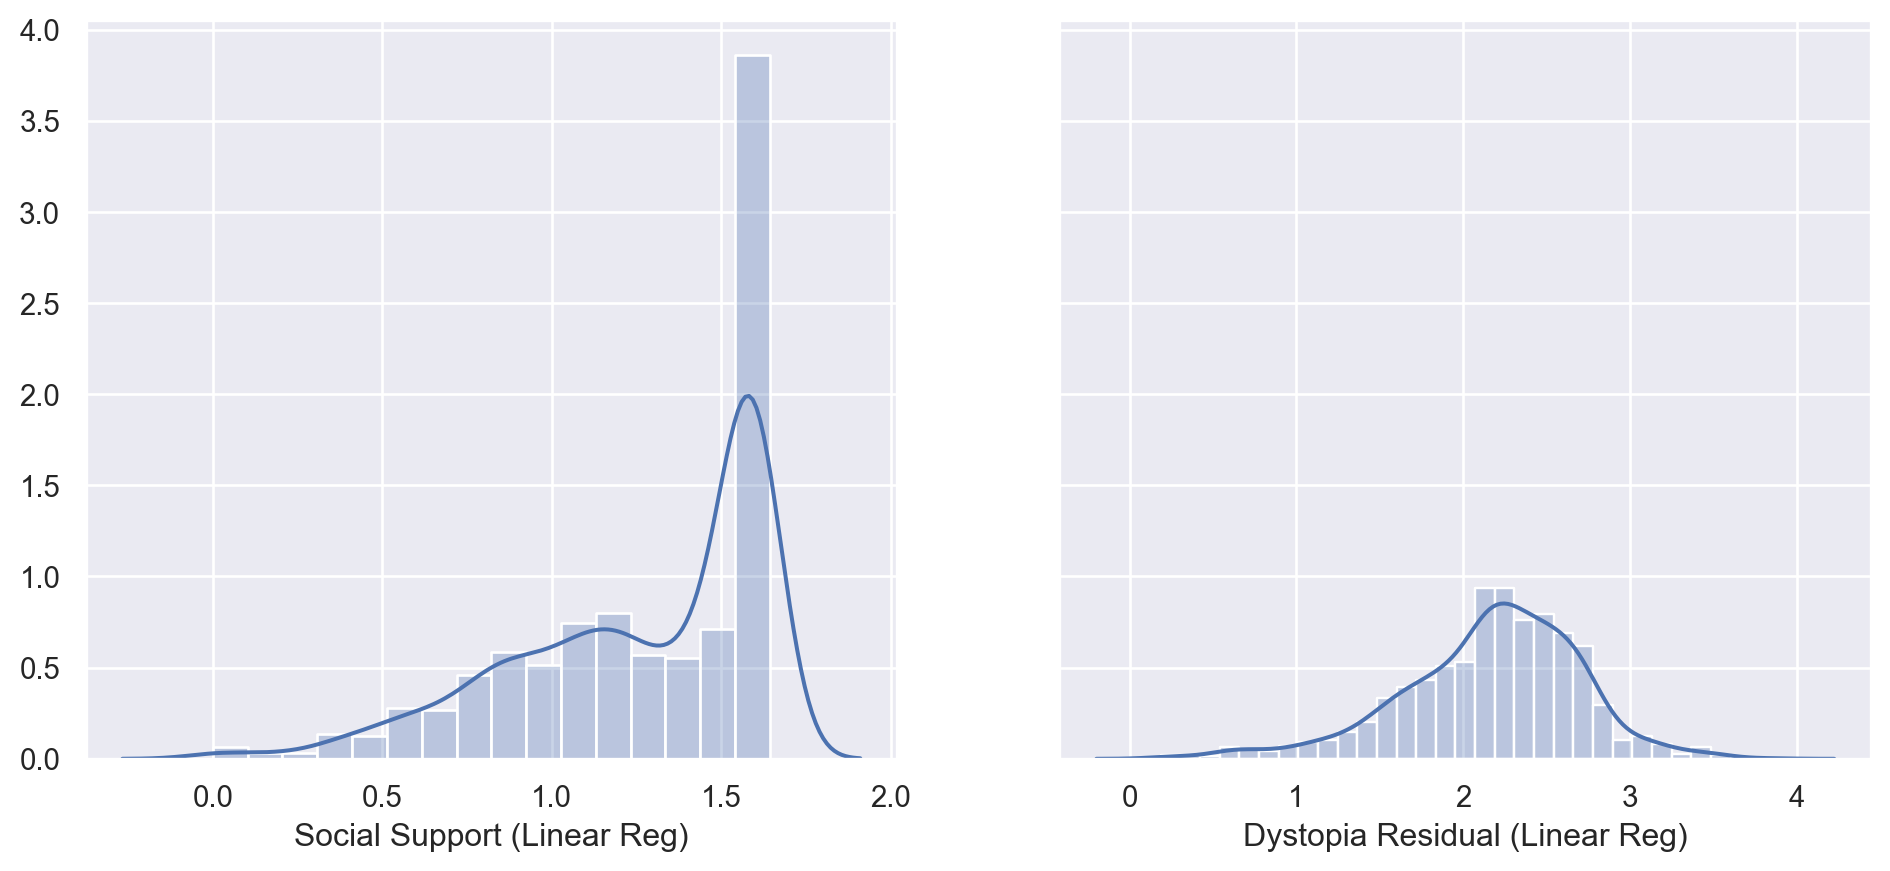

In [25]:
# Plot distribution of columns with imputed values with Linear Regression
f = Figure(figsize=(12, 5))
(
    so.Plot(df_LRimputer)
    .add(so.Bars(alpha=.3), so.Hist("density"))
    .add(so.Line(), so.KDE())
    .pair(x=['Social support', 'Dystopia Residual'])
    .label(x0="Social Support (Linear Reg)", x1="Dystopia Residual (Linear Reg)")
    .on(f)
)

We can see that linear regressor skewed the Social Support distribution a lot to the right, so we migh forsee that it is not a good aproximation for our case.

#### Spline Regression

In [26]:
df_SRimputer = df_le.interpolate(method='spline', order=5, limit_direction='both', axis=0)[['Social support', 'Dystopia Residual']]
df_SRimputer

,Social support,Dystopia Residual
0,104.901783,2.51738
1,104.241429,2.70201
2,103.584364,2.49204
3,102.930576,2.46531
4,102.280053,2.45176
...,...,...
1225,0.815000,0.18700
1226,0.133000,0.53600
1227,0.690000,0.54800
1228,0.498000,0.21600


In [27]:
# Check missing values again 
df_SRimputer.isna().sum()

Social support       0
Dystopia Residual    0
dtype: int64

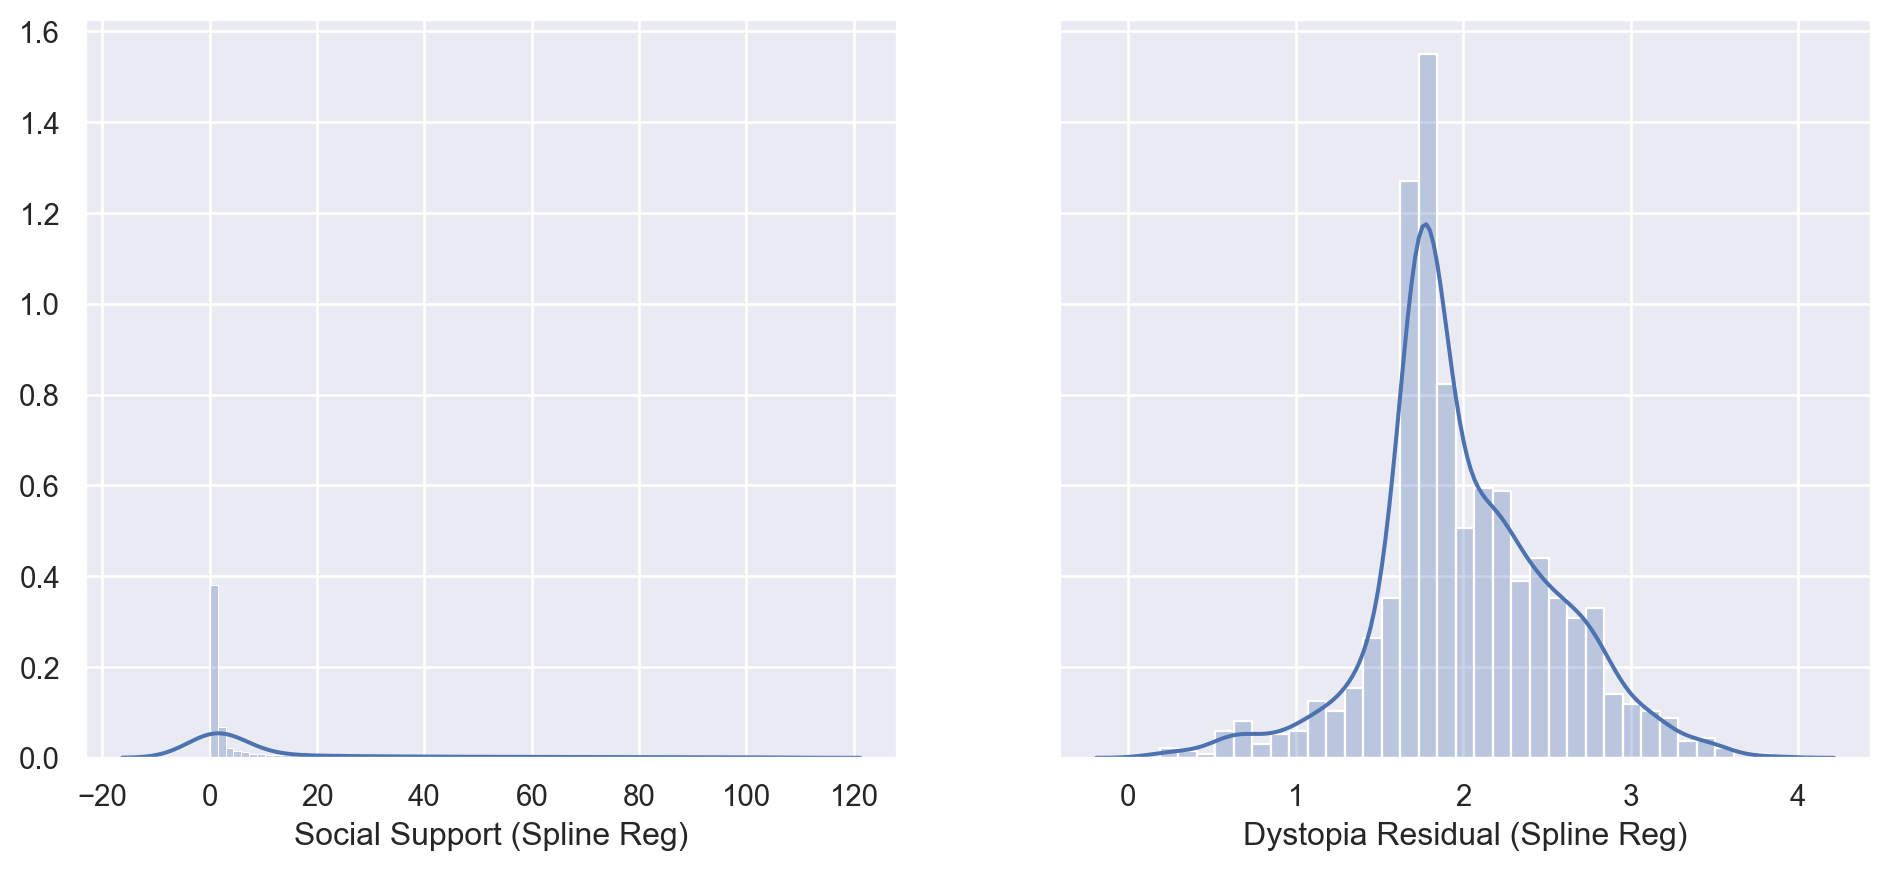

In [28]:
# Plot distribution of columns with imputed values with Spline
f = Figure(figsize=(12, 5))
(
    so.Plot(df_SRimputer)
    .add(so.Bars(alpha=.3), so.Hist("density"))
    .add(so.Line(), so.KDE())
    .pair(x=['Social support', 'Dystopia Residual'])
    .label(x0="Social Support (Spline Reg)", x1="Dystopia Residual (Spline Reg)")
    .on(f)
)

For social support we can see it created values too low and wide.

### From Derivatives Regression
Construct a piecewise polynomial in the Bernstein basis, compatible with the specified values and derivatives at breakpoints.

If k derivatives are specified at a breakpoint x, the constructed polynomial is exactly k times continuously differentiable at x, unless the order is provided explicitly. In the latter case, the smoothness of the polynomial at the breakpoint is controlled by the order.

Deduces the number of derivatives to match at each end from order and the number of derivatives available. If possible it uses the same number of derivatives from each end; if the number is odd it tries to take the extra one from y2. In any case if not enough derivatives are available at one end or another it draws enough to make up the total from the other end.

If the order is too high and not enough derivatives are available, an exception is raised.

In [29]:
df_DRimputer = df_le.interpolate(method='from_derivatives', limit_direction='both', axis=0)[['Social support', 'Dystopia Residual']]
df_DRimputer

,Social support,Dystopia Residual
0,NaN,2.51738
1,NaN,2.70201
2,NaN,2.49204
3,NaN,2.46531
4,NaN,2.45176
...,...,...
1225,0.815,0.18700
1226,0.133,0.53600
1227,0.690,0.54800
1228,0.498,0.21600


In [30]:
# Check missing values again 
df_DRimputer.isna().sum()

Social support       470
Dystopia Residual      0
dtype: int64

It was not able to interpolate the first variables, therefor not used for comparison.

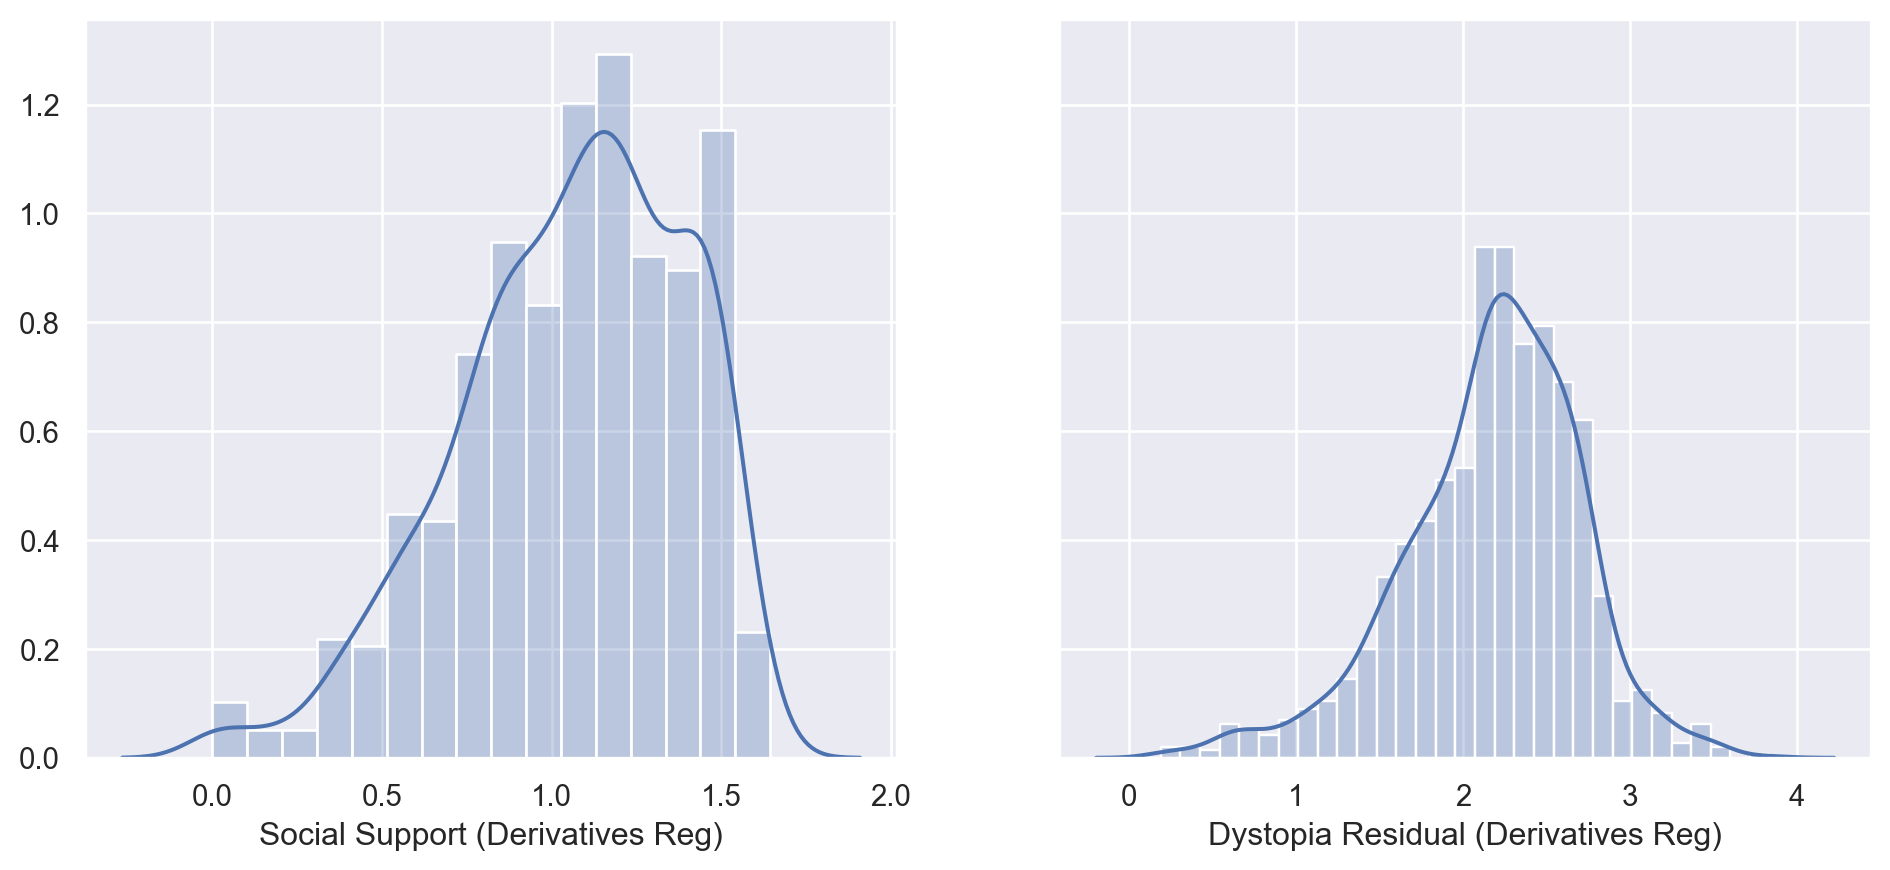

In [31]:
# Plot distribution of columns with imputed values with Derivatives
f = Figure(figsize=(12, 5))
(
    so.Plot(df_DRimputer)
    .add(so.Bars(alpha=.3), so.Hist("density"))
    .add(so.Line(), so.KDE())
    .pair(x=['Social support', 'Dystopia Residual'])
    .label(x0="Social Support (Derivatives Reg)", x1="Dystopia Residual (Derivatives Reg)")
    .on(f)
)

## Compare

None of the predicted values will be completely accurate, and as we dont have the real values to compare we can not trully validate. But we could select the one that keeps the distribution or separate the dataset into two, one with the rows with nan and compare both distributions.

In [32]:
# Prepare df
df_KNNimputer['regressor'] = 'KNN'
df_LRimputer['regressor'] = 'Linear'
df_SRimputer['regressor'] = 'Spline'
df_DRimputer['regressor'] = 'Derivatives'
df_basic = df[['Social support', 'Dystopia Residual']].copy().assign(regressor='Original')

In [33]:
# SOCIAL SUPPORT
frames = [df_basic, df_KNNimputer[['regressor', 'Social support']], df_LRimputer[['regressor', 'Social support']]] #  , df_DRimputer[['regressor', 'Social support']]
ss_results =  pd.concat(frames).reset_index(drop=True)
ss_results

,Social support,Dystopia Residual,regressor
0,NaN,2.51738,Original
1,NaN,2.70201,Original
2,NaN,2.49204,Original
3,NaN,2.46531,Original
4,NaN,2.45176,Original
...,...,...,...
3685,0.815,NaN,Linear
3686,0.133,NaN,Linear
3687,0.690,NaN,Linear
3688,0.498,NaN,Linear


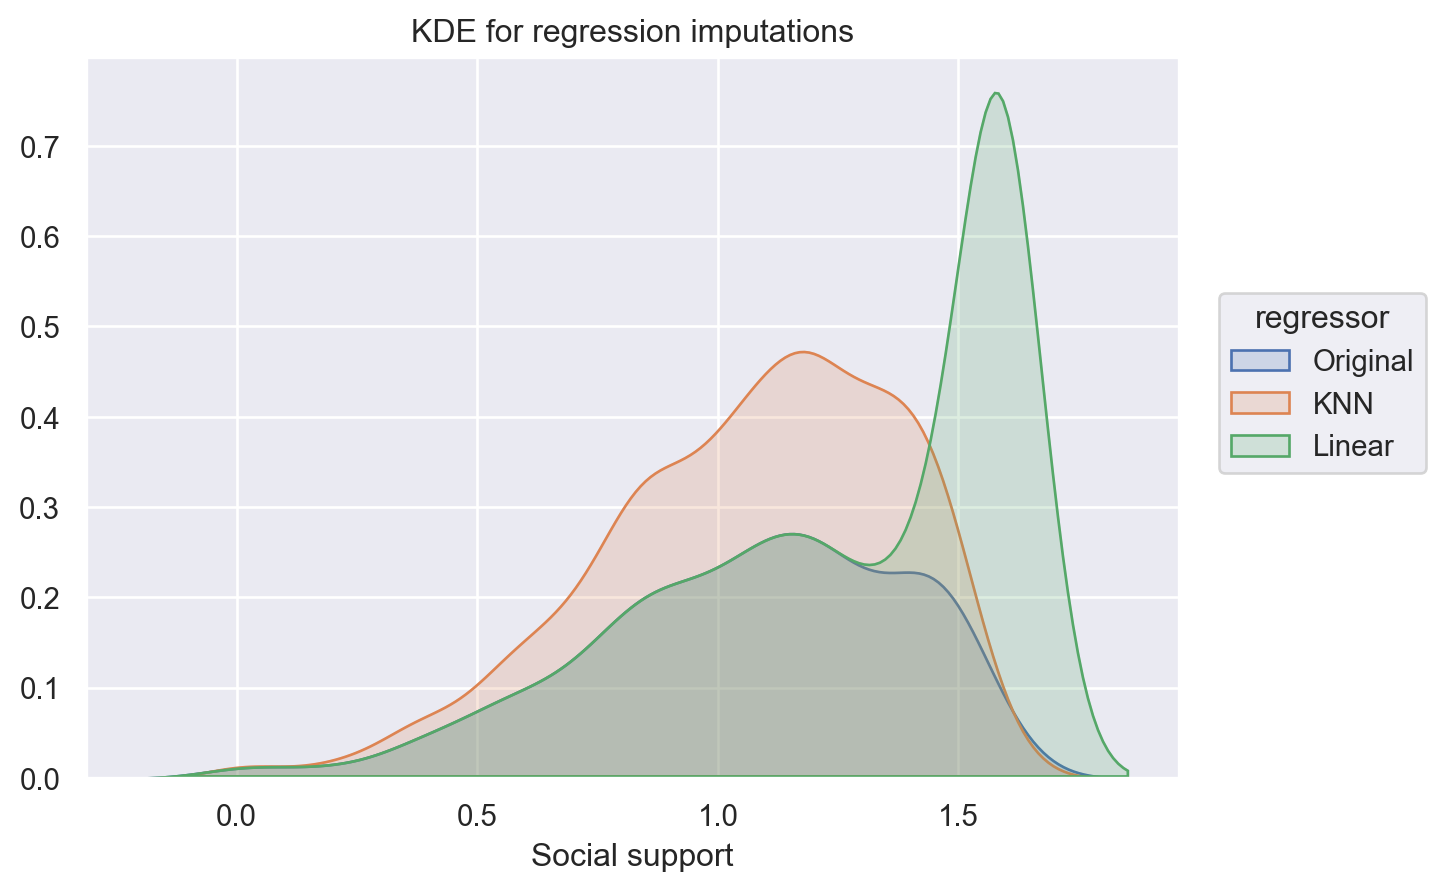

In [34]:
(
    so.Plot(ss_results, x="Social support")
    .add(so.Area(), so.KDE(), color="regressor")
    .label(title="KDE for regression imputations")
)

- KNN imputer seems to model best the original distribution for the variable Social Support.

In [35]:
# DYSTOPIA RESIDUAL
frames = [df_basic, df_KNNimputer[['regressor', 'Dystopia Residual']], df_LRimputer[['regressor', 'Dystopia Residual']], df_SRimputer[['regressor', 'Dystopia Residual']], df_DRimputer[['regressor', 'Dystopia Residual']]]
dr_results =  pd.concat(frames).reset_index(drop=True)
dr_results

,Social support,Dystopia Residual,regressor
0,NaN,2.51738,Original
1,NaN,2.70201,Original
2,NaN,2.49204,Original
3,NaN,2.46531,Original
4,NaN,2.45176,Original
...,...,...,...
6145,NaN,0.18700,Derivatives
6146,NaN,0.53600,Derivatives
6147,NaN,0.54800,Derivatives
6148,NaN,0.21600,Derivatives


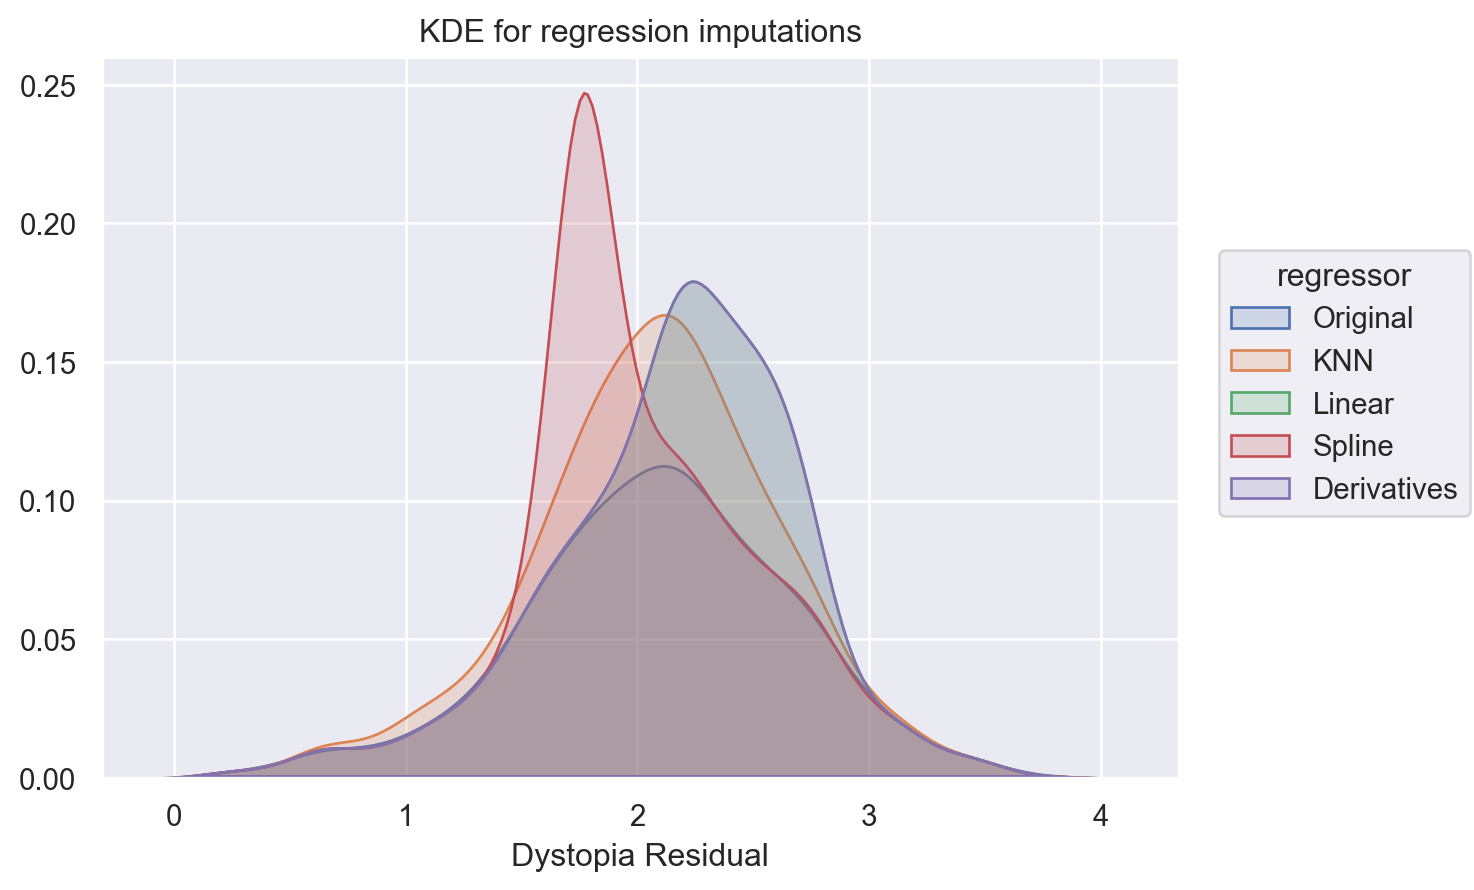

In [36]:
(
    so.Plot(dr_results, x="Dystopia Residual")
    .add(so.Area(), so.KDE(), color="regressor")
    .label(title="KDE for regression imputations")
)

- Linear and Derivatives are the same.

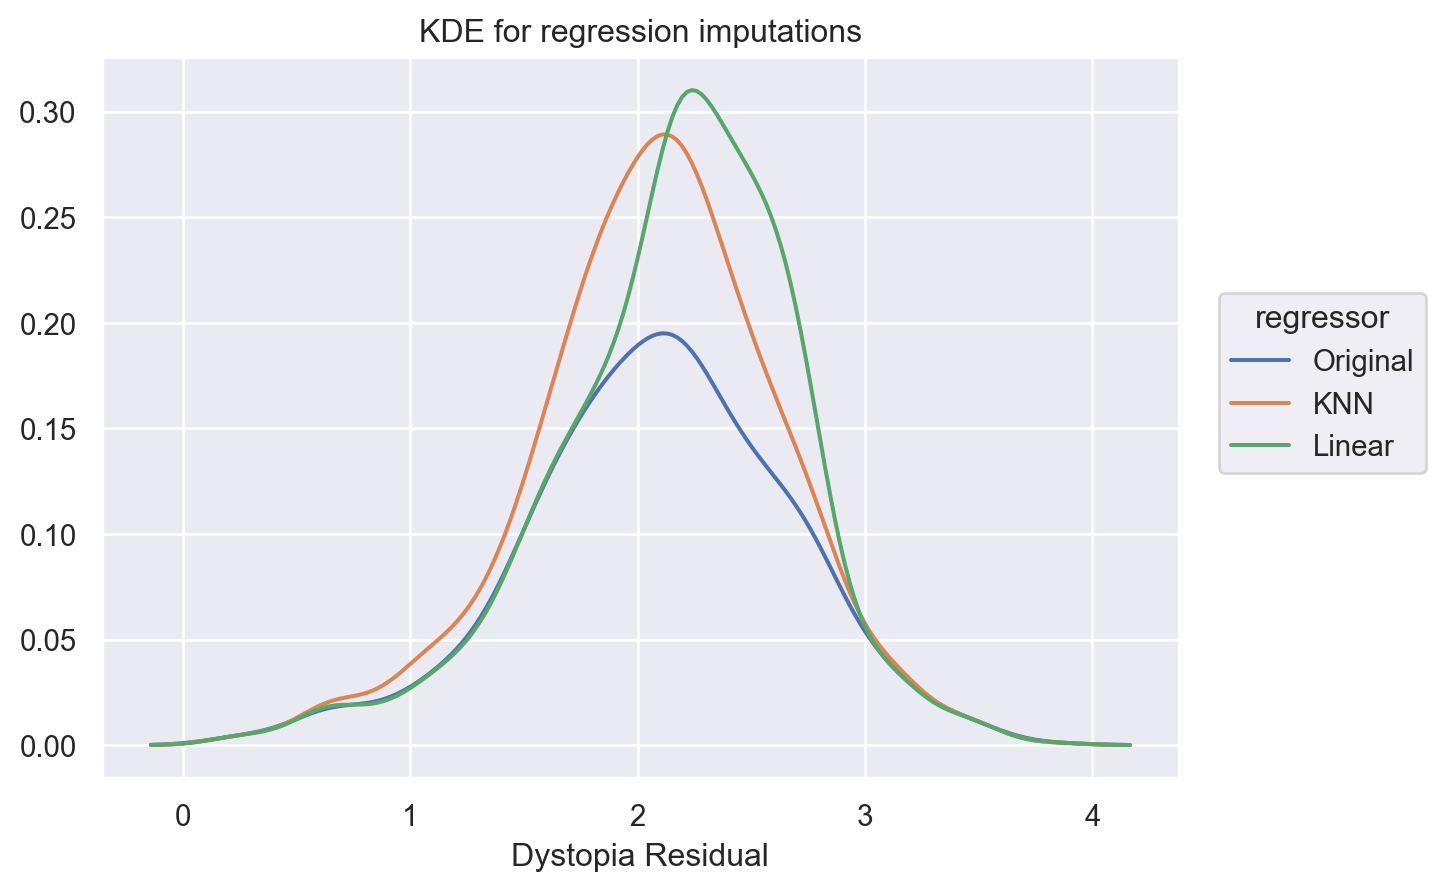

In [37]:
(
    so.Plot(dr_results[dr_results['regressor'].isin(['Original', 'Linear', 'KNN'])], x="Dystopia Residual")
    .add(so.Line(), so.KDE(), color="regressor")
    .label(title="KDE for regression imputations")
)

- KNN imputer seems to model best the original distribution for the variable Dystopia Residual.

In [38]:
df_imputed = df.copy()
df_imputed['Social support'] = df_KNNimputer['Social support']
df_imputed['Dystopia Residual'] = df_KNNimputer['Dystopia Residual']

df_imputed

,Year,Country,Happiness Rank,Happiness Score,Freedom,Generosity,Healthy life expectancy,Perceptions of corruption,GDP per capita,Social support,Dystopia Residual,Region
0,2015,Switzerland,1,7.587,0.66557,0.29678,0.94143,0.41978,1.39651,1.422681,2.51738,Western Europe
1,2015,Iceland,2,7.561,0.62877,0.43630,0.94784,0.14145,1.30232,1.461513,2.70201,Western Europe
2,2015,Denmark,3,7.527,0.64938,0.34139,0.87464,0.48357,1.32548,1.403490,2.49204,Western Europe
3,2015,Norway,4,7.522,0.66973,0.34699,0.88521,0.36503,1.45900,1.401235,2.46531,Western Europe
4,2015,Canada,5,7.427,0.63297,0.45811,0.90563,0.32957,1.32629,1.340878,2.45176,North America
...,...,...,...,...,...,...,...,...,...,...,...,...
1225,2022,Botswana,142,3.471,0.57100,0.01200,0.28000,0.10200,1.50300,0.815000,0.18700,Sub-Saharan Africa
1226,2022,Rwanda,143,3.268,0.62100,0.18700,0.46200,0.54400,0.78500,0.133000,0.53600,Sub-Saharan Africa
1227,2022,Zimbabwe,144,2.995,0.32900,0.10600,0.27000,0.10500,0.94700,0.690000,0.54800,Sub-Saharan Africa
1228,2022,Lebanon,145,2.955,0.10300,0.08200,0.63100,0.03400,1.39200,0.498000,0.21600,Middle East and Northern Africa


# Outliers

In [46]:
numeric_df = df_imputed.drop(['Country', 'Region'], axis=1)

def remove_outliers(df):
    count = 0
    for column in df.columns:
        Q1, Q3 = np.percentile(df[column], [25, 75])
        IQR = Q3 - Q1
        lower_range = Q1 - (1.5 * IQR)
        upper_range = Q3 + (1.5 * IQR)
        count+= df[(df[column] < lower_range) & (df[column] > upper_range)].shape[0]

        df = df[(df[column] > lower_range) & (df[column] < upper_range)]

    print(f"Encounted {count} outliers")

remove_outliers(numeric_df)

Encounted 0 outliers


In [ ]:
# Save imputed data
df_imputed.to_csv('../data/processed/WorldHappiness2015_2022.csv', index=False)